# Exercise 3

Authors: Joseph Weibel, Rebecka Fahrni

In [3]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np


## 1 Implementing convolution

* *1a.) Generatinng signal:*

    Generate a 1-dimensional signal with 100 data points. All data points should be zero except the data points at the index between 50 and 70 (mySignal[50:70]). These data points should have the value of 1.


* *1b.) Generating kernel:*

    Generate a 1-dimensional kernel with size of 6. The values of the kernel should be [1. 0.8 0.6 0.4 0.2 0] (keep the order the same while generating the kernel)


* *1c.) Convolution:*

    Implement your own Python function that takes a signal and a kernel as parameters and computes their convolution without using built-in convolution functions available in existing libraries (e.g. NumPy, Scipy, etc.) This function should return the output signal after the convolution. Call your convolution function with the signal and kernel you created before
    

Important : Solutions with any library’s convolution function will not be accepted




In [18]:
# 1a. signal gneration : all zeros expect index between 50 and 70
mySignal = np.zeros(100)
mySignal[50:70] = 1 

# 1b.kernel size 6 and values 1, 0.8, 0.6, 0.4, 0.2, 0
myKernel = np.array([1, 0.8, 0.6, 0.4, 0.2, 0])

# 1c. convolution function
def my_convolution(signal, kernel):
    kernel = kernel[::-1]  
    len_signal = len(signal)
    len_kernel = len(kernel)
    out_size = len_signal + len_kernel - 1 # size of output signal
    
    # padding for edges 
    pad = np.zeros(out_size) 
    out = np.zeros(out_size) # output signal
    pad[len_kernel-1:len_signal+len_kernel-1] = signal
    for i in range(len_signal + len_kernel - 1):
        for j in range(len_kernel):
            if i-j < 0 or i-j >= len_signal:
                continue
            out[i] += pad[i-j+len_kernel-1] * kernel[j]
    return out

# call function
output= my_convolution(mySignal, myKernel)
output


array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2,
       0.6, 1.2, 2. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. ,
       3. , 3. , 3. , 3. , 3. , 3. , 2.8, 2.4, 1.8, 1. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. ])

* *1d.) Plotting signalsl:*

    Plot signal that you created before and after convolution, as well as the kernel


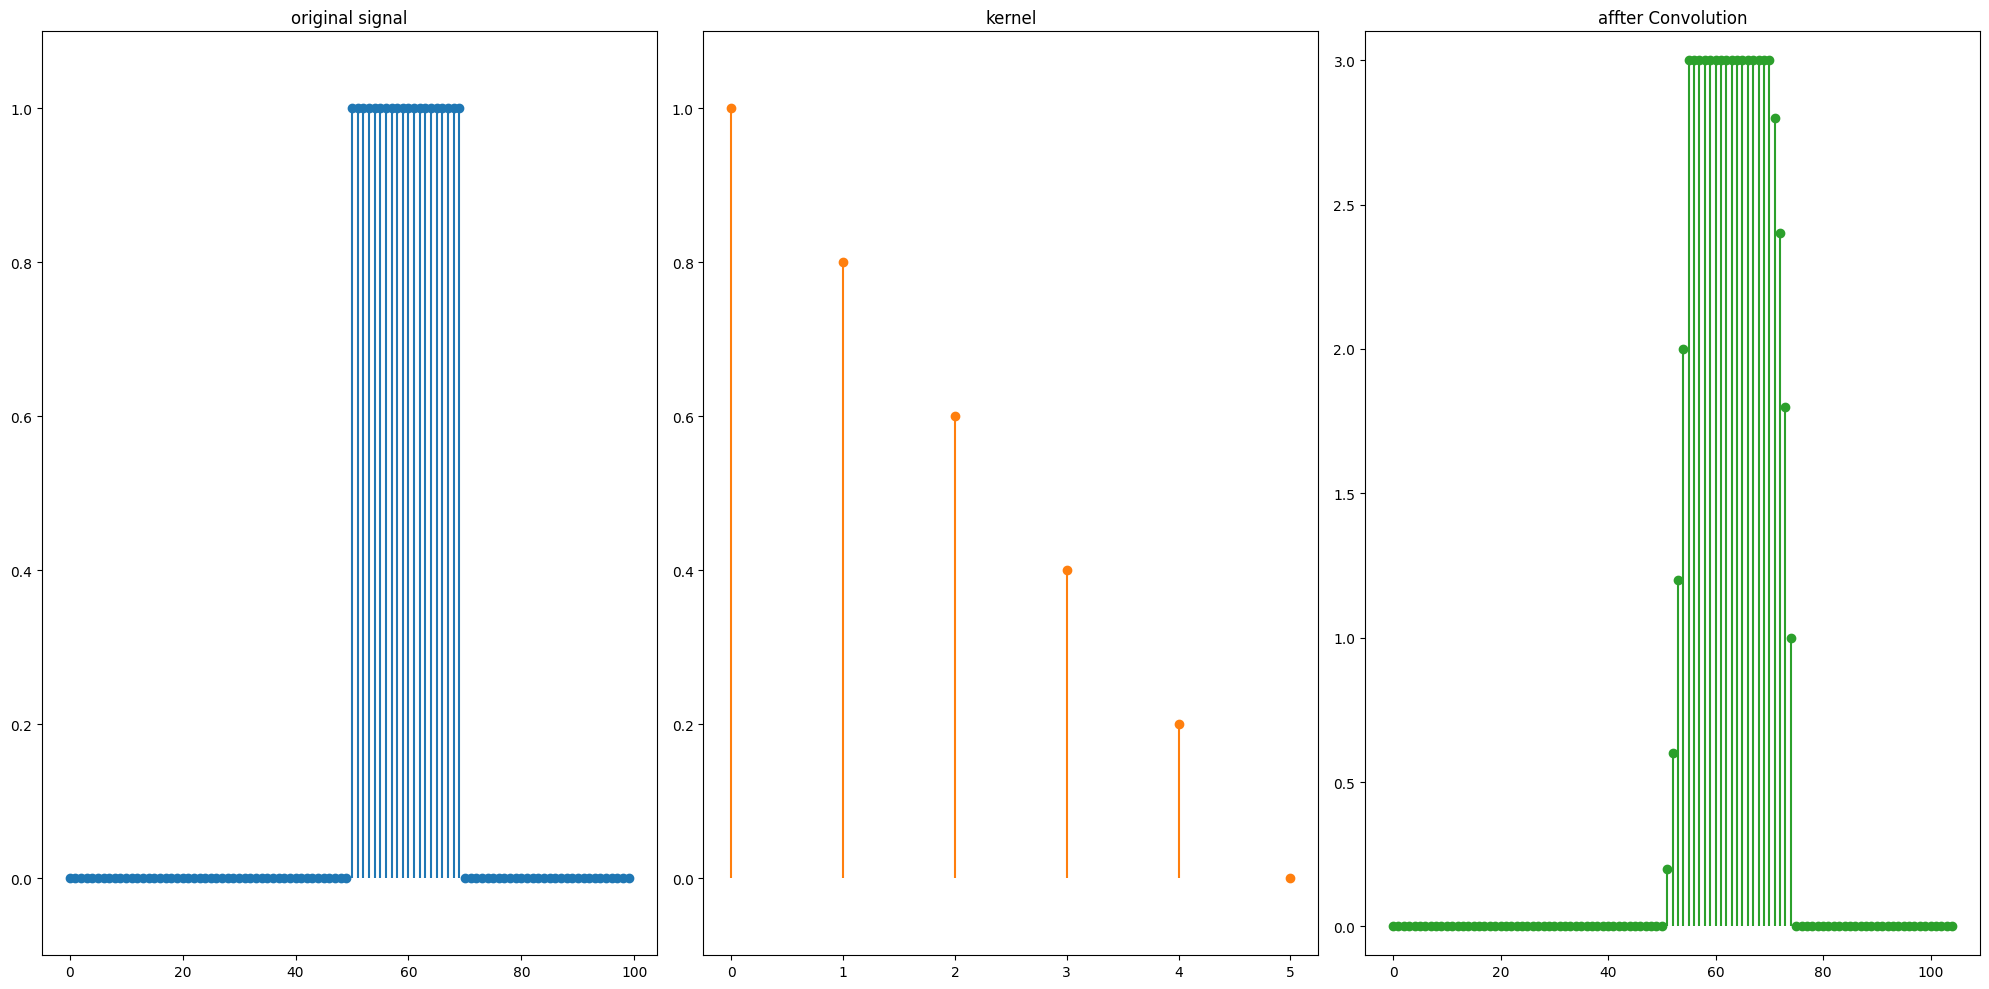

In [22]:
plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
plt.stem(mySignal, basefmt=" ", linefmt='C0-', markerfmt='C0o')
plt.title('original signal')
plt.ylim(-0.1, 1.1)

plt.subplot(1, 3, 2)
plt.stem(myKernel, basefmt=" ", linefmt='C1-', markerfmt='C1o')
plt.title('kernel')
plt.ylim(-0.1, 1.1)

plt.subplot(1, 3, 3)
plt.stem(output, basefmt=" ", linefmt='C2-', markerfmt='C2o')
plt.title('affter Convolution')
plt.ylim(-0.1, max(output)+0.1)

plt.tight_layout()
plt.show()





* *1e.) Describing the effects of convolution:*

    Describe how conovlution affects singal that you created


the original signal is just a step function with all values 0 expect between indices 50 and 70 it is 1.

the kernel is a decreasing function with values [1. 0.8 0.6 0.4 0.2 0] (also indicating weights for the later convolution).

after convolution of the signal with the kernel we get a weighted sum of the signal values in the range of the kernel. The kernel is shifted over signal so that weighted sum is calculated for each position. So at the end we get a smoothed version of the original signal.

--- 

## 2 Filtering EMG data via Fourier transformation

* *2a.) Importing raw data:*

    import data file 'emg_healthy.npy'. 

* *2b.) Applying Fourier transfomation:*

    Apply a Fourier transformation to decompose data to its frequency components and plot the power spectrum. You are allowed to use Fourier transformation functions from SciPy library

* *2c.) Band-pass filtering via Fourier transform:*
    
    Apply a high pass filter at 200 Hz and low pass filter at 400 Hz using the Fourier transaformation. Plot the power spectrum after filtering.

Important : Solutions filtering the data without using a Fourier transform will not be
accepted.



{'datatype': dtype('float64'), 'shape': (50860, 1), '5 firstamples': array([[-0.0333],
       [-0.035 ],
       [-0.035 ],
       [-0.03  ],
       [-0.03  ]])}


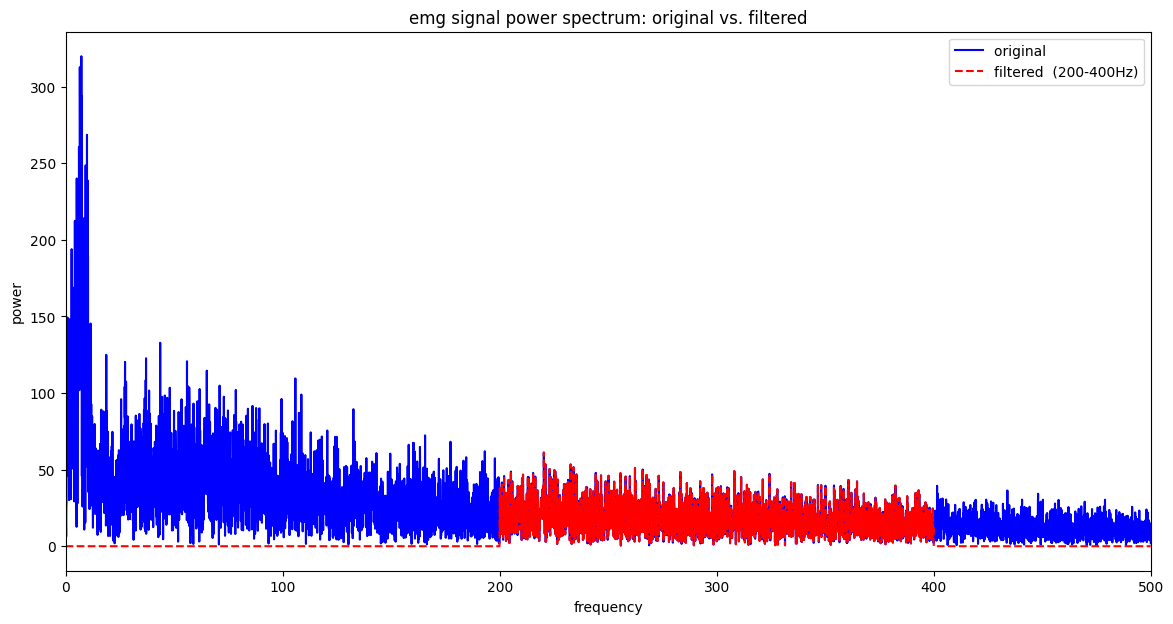

In [51]:
from scipy.fft import rfft, rfftfreq

# importing raw data
sampling_rate = 4000 
emg_data = np.load('data/emg_healthy.npy')

emg_data_info = {
    "datatype": emg_data.dtype,
    "shape": emg_data.shape,
    "5 firstamples": emg_data[:5]
}

print(emg_data_info)

# fourier  to decompose data to its frequency components and plot  power spectrum
emg_fft = rfft(emg_data.flatten())
freqs = rfftfreq(emg_data.size, 1/sampling_rate)

# High-pass filter at 200 Hz: zero out frequencies below 200 Hz
emg_fft_filtered = np.where(freqs >= 200, emg_fft, 0)
# Low-pass filter at 400 Hz: zero out frequencies above 400 Hz
emg_fft_filtered = np.where(freqs <= 400, emg_fft_filtered, 0)

plt.figure(figsize=(14, 7))
plt.plot(freqs, np.abs(emg_fft), label='original ', color='blue')
plt.plot(freqs, np.abs(emg_fft_filtered), label='filtered  (200-400Hz)', color='red', linestyle='--')
plt.title('emg signal power spectrum: original vs. filtered')
plt.xlabel('frequency')
plt.ylabel('power')
plt.legend()
plt.xlim([0, 500])  # Limit the x-axis to 0-500 Hz for clarity

# Show the plot
plt.show()